

A tutorial for connecting GRASS and Python can be found [here](https://github.com/chaedri/GIS714-assignments/blob/main/Topic1_Foundations/JupyterOnWindows_Tutorial.ipynb).

`set PATH=%PATH%;C:\Program Files\GRASS GIS 8.2\`

`set PATH=%PATH%;C:\Users\tgest\AppData\Roaming\Python\python39\Scripts`

`jupyter lab --notebook-dir=D:`

### Colorado Springs

In [10]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import Image

# Ask GRASS GIS where its Python packages are.
grass_call = "grass82"
sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Create a GRASS GIS session.
gj.init("D:/GLISA-WWA", "WWA", "WWA_22")
os.chdir(r'D:\GLISA-WWA\Paper_runs\Colorado_springs')

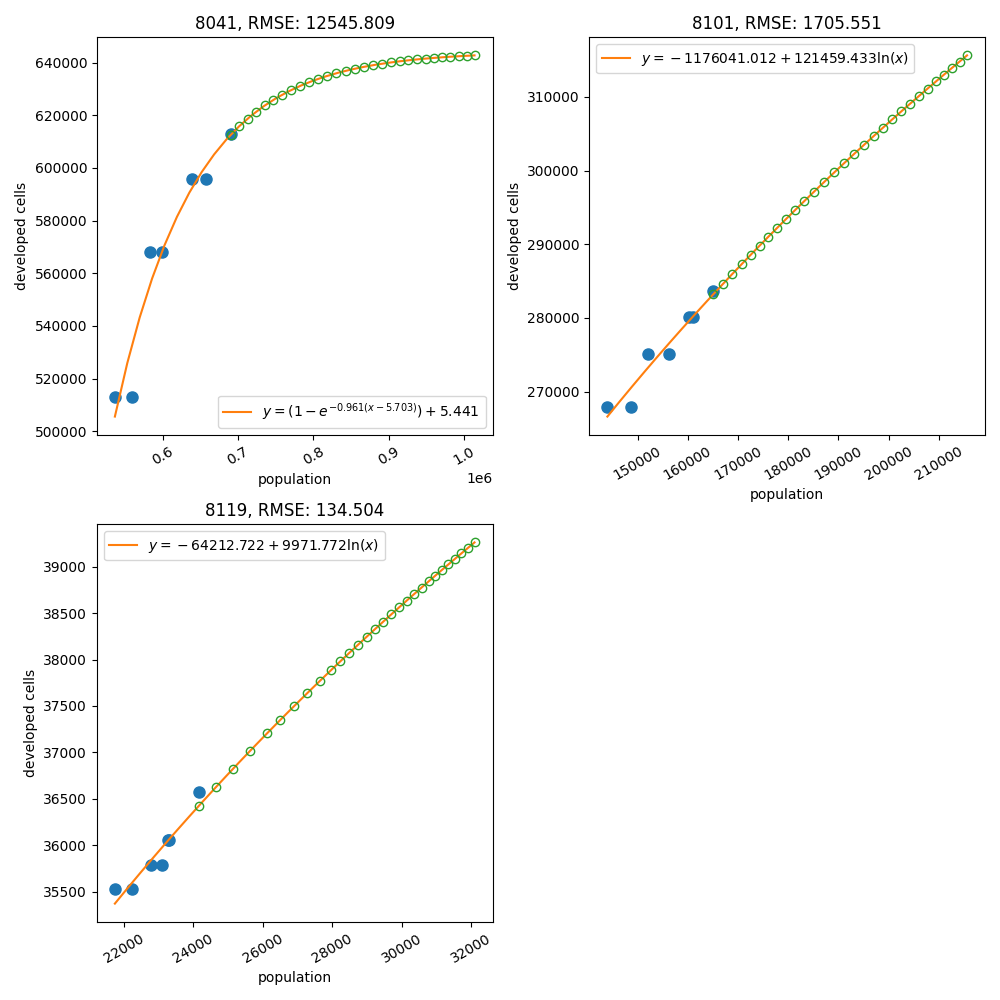

In [4]:
gs.run_command('r.futures.demand',
               development='urban_2001,urban_2004,urban_2006,urban_2008,urban_2011,urban_2013,urban_2016',
               subregions='Counties_22_ras',
               observed_population='population_trend.csv',
               projected_population='population_projection.csv',
               simulation_times=','.join([str(i) for i in range(2016, 2045)]),
               plot='plot_demand.png',
               demand='demand2016.csv',
               method='logarithmic,logarithmic2,exp_approach')
               
Image('plot_demand.png')

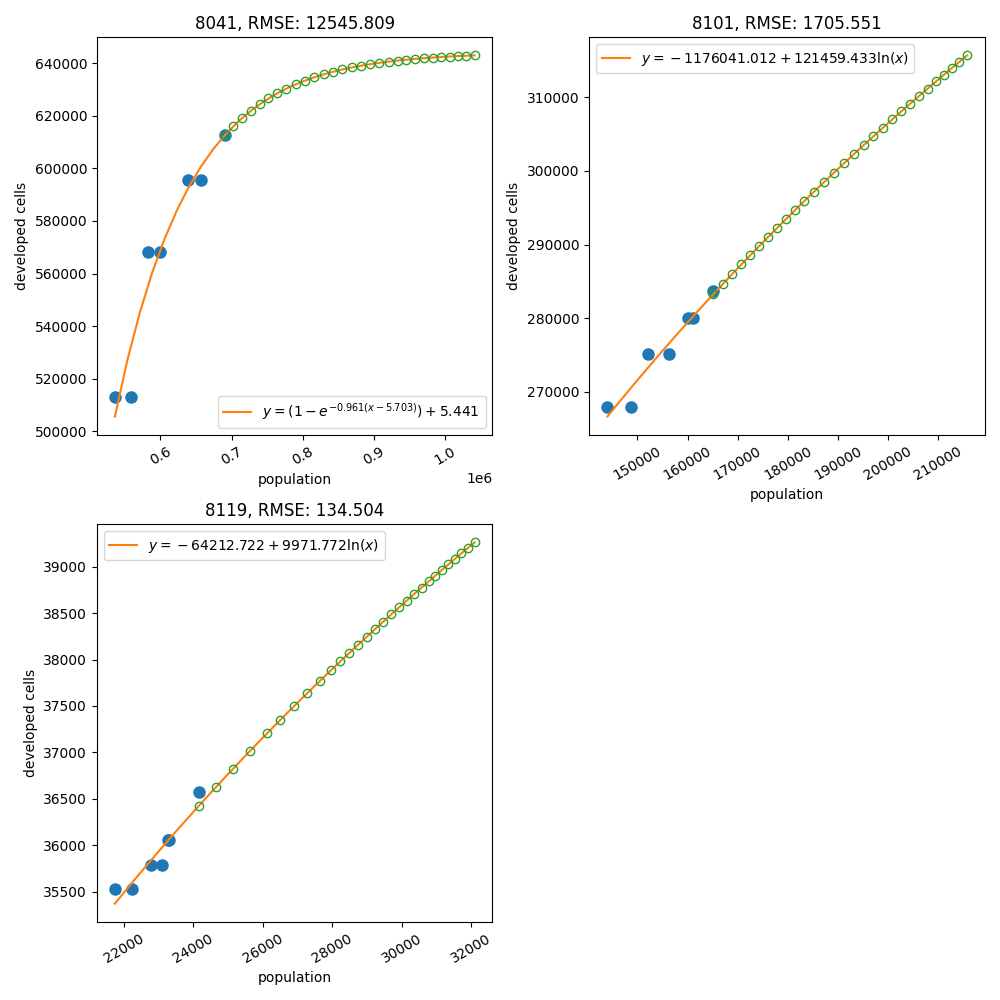

In [3]:
gs.run_command('r.futures.demand',
               development='urban_2001,urban_2004,urban_2006,urban_2008,urban_2011,urban_2013,urban_2016',
               subregions='Counties_22_ras',
               observed_population='population_trend.csv',
               projected_population='population_projection_migration.csv',
               simulation_times=','.join([str(i) for i in range(2016, 2045)]),
               plot='plot_demand_migration.png',
               demand='demand2016_migration.csv',
               method='logarithmic,logarithmic2,exp_approach')
               
Image('plot_demand_migration.png')

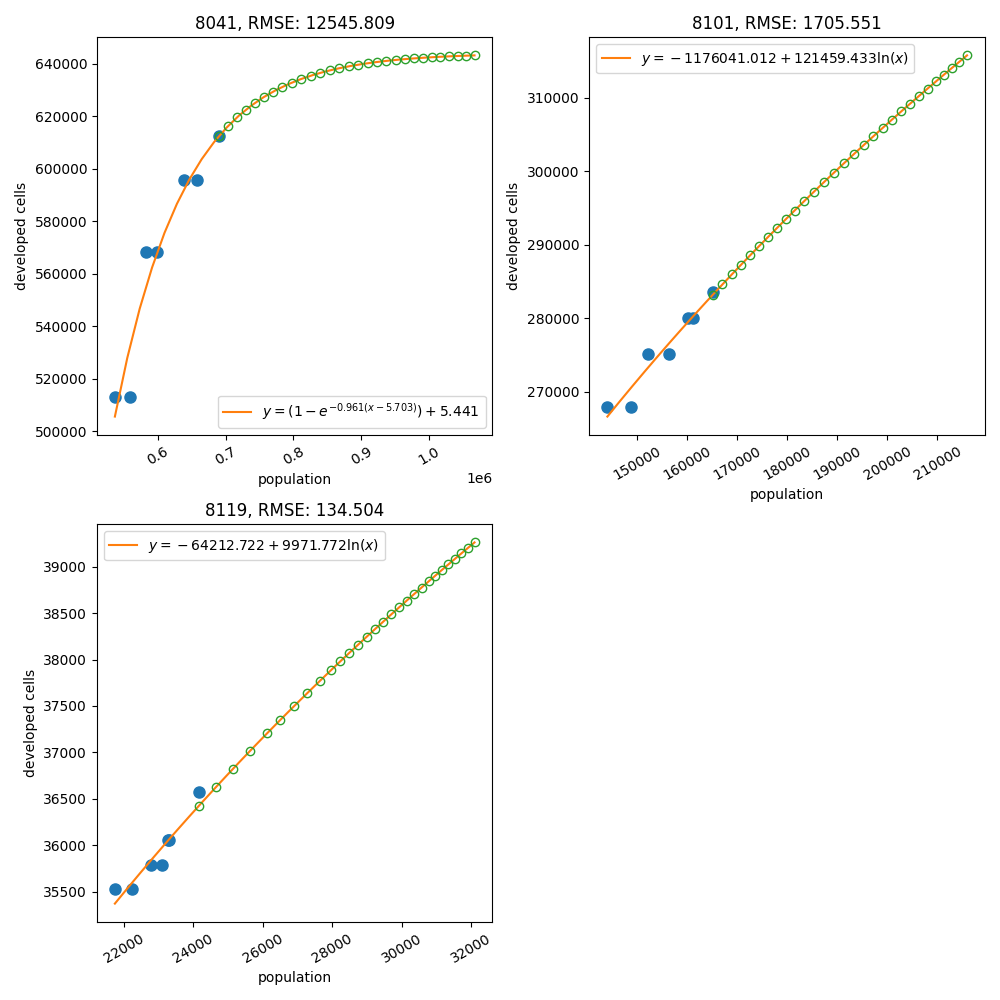

In [2]:
gs.run_command('r.futures.demand',
               development='urban_2001,urban_2004,urban_2006,urban_2008,urban_2011,urban_2013,urban_2016',
               subregions='Counties_22_ras',
               observed_population='population_trend.csv',
               projected_population='population_projection_migration2x.csv',
               simulation_times=','.join([str(i) for i in range(2016, 2045)]),
               plot='plot_demand_migration2x.png',
               demand='demand2016_migration2x.csv',
               method='logarithmic,logarithmic2,exp_approach')
               
Image('plot_demand_migration2x.png')

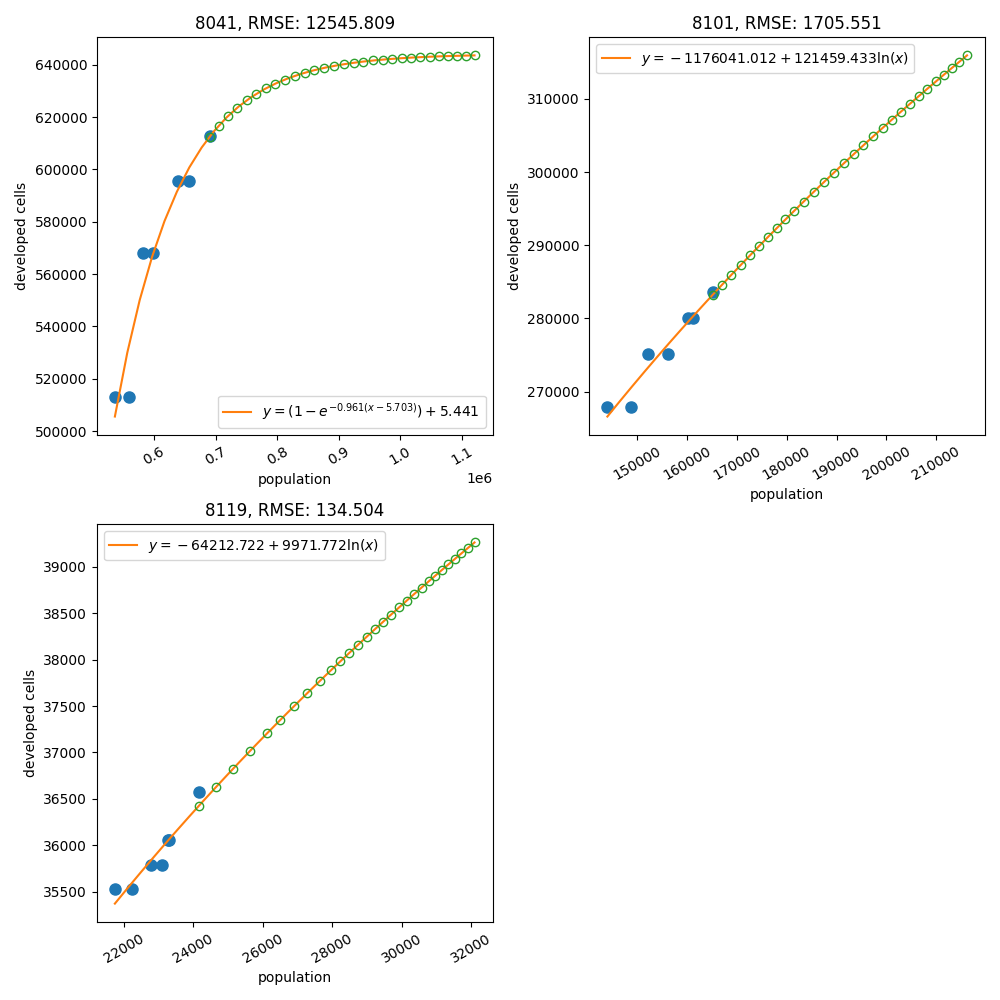

In [3]:
gs.run_command('r.futures.demand',
               development='urban_2001,urban_2004,urban_2006,urban_2008,urban_2011,urban_2013,urban_2016',
               subregions='Counties_22_ras',
               observed_population='population_trend.csv',
               projected_population='population_projection_migration4x.csv',
               simulation_times=','.join([str(i) for i in range(2016, 2045)]),
               plot='plot_demand_migration4x.png',
               demand='demand2016_migration4x.csv',
               method='logarithmic,logarithmic2,exp_approach')
               
Image('plot_demand_migration4x.png')

The following code chunk defines a function for model runs.

In [11]:
def run_futures_CS(disc_factor, comp_mean, comp_range, devpot_params, infill, name, repeat=10, demand='demand2016.csv'):
    gs.run_command('r.futures.parallelpga', 
                   overwrite=True,
                   subregions='Counties_22_ras', 
                   developed='urban_2016',
                   predictors='Cost_dist_resc,DEM_resc,WB_dist_resc,Slope_WWA,Canopy2016,OvPass_resc,Dist_prot_resc,Floodplain,public_school_dist_resc,WWA_buildings_resc,wildfire_resc',
                   devpot_params=devpot_params, 
                   development_pressure='devpressure_big_2016@Devpressure',
                   n_dev_neighbourhood=30, 
                   development_pressure_approach='gravity', 
                   gamma=0.5, 
                   scaling_factor=0.1,
                   demand=demand, 
                   discount_factor=disc_factor, compactness_mean=comp_mean, compactness_range=comp_range,
                   patch_sizes='patches22_hind.txt', 
                   num_neighbors=4, 
                   seed_search='probability',
                   output=name, 
                   nprocs=5, 
                   incentive_power=infill,
                   repeat=repeat)
    for i in range(1, repeat+1):
        run = name + "_run" + str(i)
        gs.mapcalc(run+" = if("+run+" == -1, 0, 1)")


In [12]:
# Top performing patch parameters
disc_factor = 0.9
comp_mean = 0.1
comp_range = 0.03
repeat = 50


## Standard - migration
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3.csv', 1, 'baseline', repeat)
## Infill - migration
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3.csv', 5, 'infill', repeat)
## No fire - migration
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3_nofire.csv', 1, 'nofire', repeat)
## Infill, no fire - migration
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3_nofire.csv', 5, 'infill_nofire', repeat)

In [13]:
# Top performing patch parameters
disc_factor = 0.9
comp_mean = 0.1
comp_range = 0.03
repeat = 50


## Standard
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3.csv', 1, 'baseline_migration', repeat, demand='demand2016_migration.csv')
## Infill
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3.csv', 5, 'infill_migration', repeat, demand='demand2016_migration.csv')
## No fire
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3_nofire.csv', 1, 'nofire_migration', repeat, demand='demand2016_migration.csv')
## Infill, no fire
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3_nofire.csv', 5, 'infill_nofire_migration', repeat, demand='demand2016_migration.csv')

In [14]:
# Top performing patch parameters
disc_factor = 0.9
comp_mean = 0.1
comp_range = 0.03
repeat = 50


## Standard
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3.csv', 1, 'baseline_migration2x', repeat, demand='demand2016_migration2x.csv')
## Infill
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3.csv', 5, 'infill_migration2x', repeat, demand='demand2016_migration2x.csv')
## No fire
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3_nofire.csv', 1, 'nofire_migration2x', repeat, demand='demand2016_migration2x.csv')
## Infill, no fire
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3_nofire.csv', 5, 'infill_nofire_migration2x', repeat, demand='demand2016_migration2x.csv')

In [15]:
# Top performing patch parameters
disc_factor = 0.9
comp_mean = 0.1
comp_range = 0.03
repeat = 50


## Standard
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3.csv', 1, 'baseline_migration4x', repeat, demand='demand2016_migration4x.csv')
## Infill
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3.csv', 5, 'infill_migration4x', repeat, demand='demand2016_migration4x.csv')
## No fire
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3_nofire.csv', 1, 'nofire_migration4x', repeat, demand='demand2016_migration4x.csv')
## Infill, no fire
run_futures_CS(disc_factor, comp_mean, comp_range, 'CS_Pueblo_ss_round3_nofire.csv', 5, 'infill_nofire_migration4x', repeat, demand='demand2016_migration4x.csv')

In [4]:
def lu_stats(run, hazard):
    lustats = gs.read_command('r.stats', flags = 'c', input=run+',WWA_NLCD_16@PERMANENT')
    ag_loss = forest_loss = risk_dev = newurb = 0
    for line in lustats.strip().splitlines():
        cat1,cat2,cells = line.split()
        if cat1 == '1':
            if cat2 in ['81','82']:
                ag_loss += int(cells)
            elif cat2 in ['41','42','43']:
                forest_loss += int(cells)
        
    hazstats = gs.read_command('r.stats', flags = 'c', input=run+','+hazard) 
    for line in hazstats.strip().splitlines():
        cat1,cat2,cells = line.split()
        if cat1 == '1' and cat2 == '1':
            risk_dev += int(cells)
            
    urbstats = gs.read_command('r.stats', flags = 'c', input = run+',urban_2016@PERMANENT')
    for line in urbstats.strip().splitlines():
        cat1,cat2,cells = line.split()
        if cat1 == '1' and cat2 != '1':
            newurb += int(cells)
    
    return [ag_loss, forest_loss, risk_dev, newurb]

In [5]:
# remove previous mask
#gs.run_command('r.mask', flags = 'r')
#re-add
gs.run_command('r.mask', raster='statsmask@Hindcasting22')

#initial = lu_stats("urban_2016", "Floodplain_GLISA@PERMANENT")

column_names = ['run', 'ag_loss', 'forest_loss', 'risk_dev', 'newurb']
basedf = pd.DataFrame(columns = column_names)
infilldf = pd.DataFrame(columns = column_names)
nofiredf = pd.DataFrame(columns = column_names)
infillnofiredf = pd.DataFrame(columns = column_names)

for i in range(1, 51):
    run = 'baseline_run' + str(i)
    runstats = lu_stats(run, "wildfire_top_quintile")
    basedf.loc[len(basedf)] = [i] + runstats
    
for i in range(1, 51):
    run = 'infill_run' + str(i)
    runstats = lu_stats(run, "wildfire_top_quintile")
    infilldf.loc[len(infilldf)] = [i] + runstats
    
for i in range(1, 51):
    run = 'nofire_run' + str(i)
    runstats = lu_stats(run, "wildfire_top_quintile")
    nofiredf.loc[len(nofiredf)] = [i] + runstats
    
for i in range(1, 51):
    run = 'infill_nofire_run' + str(i)
    runstats = lu_stats(run, "wildfire_top_quintile")
    infillnofiredf.loc[len(infillnofiredf)] = [i] + runstats
    
infillnofiredf.head()

,run,ag_loss,forest_loss,risk_dev,newurb
0,1,1989,3614,88383,67084
1,2,2846,7053,95999,72701
2,3,2861,4019,89773,67115
3,4,2900,3776,90458,67084
4,5,3533,6287,93320,67084


In [6]:
basedf.to_csv('basedf.csv')
infilldf.to_csv('infilldf.csv')
nofiredf.to_csv('nofiredf.csv')
infillnofiredf.to_csv('infillnofiredf.csv')

In [7]:
gs.mapcalc("freqmap_base = baseline_run1")
for i in range(2,51):
    gs.mapcalc("freqmap_base = freqmap_base + baseline_run"+str(i))
    
gs.mapcalc("freqmap_infill = infill_run1")
for i in range(2,51):
    gs.mapcalc("freqmap_infill = freqmap_infill + infill_run"+str(i))
    
gs.mapcalc("freqmap_nofire = nofire_run1")
for i in range(2,51):
    gs.mapcalc("freqmap_nofire = freqmap_nofire + nofire_run"+str(i))
    
gs.mapcalc("freqmap_infillnofire = infill_nofire_run1")
for i in range(2,51):
    gs.mapcalc("freqmap_infillnofire = freqmap_infillnofire + infill_nofire_run"+str(i))

In [ ]:
## Fragmentation Stats

### Grand Rapids

In [1]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import Image

# Ask GRASS GIS where its Python packages are.
grass_call = "grass82"
sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Create a GRASS GIS session.
gj.init("D:/GLISA-WWA", "GLISA", "GR22")
os.chdir(r'D:\GLISA-WWA\Paper_runs\Grand_rapids')

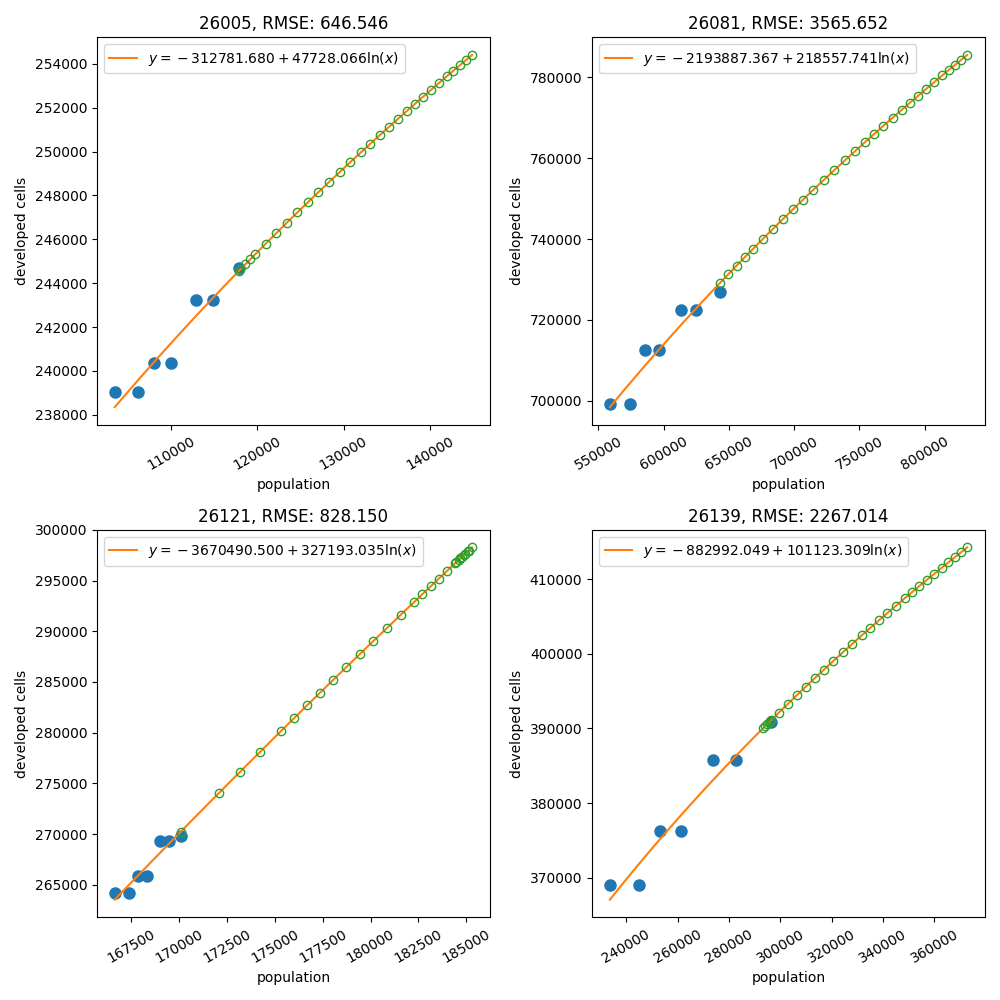

In [6]:
gs.run_command('r.futures.demand',
               development='urban_2001,urban_2004,urban_2006,urban_2008,urban_2011,urban_2013,urban_2016',
               subregions='GR_counties',
               observed_population='population_trend.csv',
               projected_population='population_projection.csv',
               simulation_times= ','.join([str(i) for i in range(2016, 2045)]),
               plot='plot_demand.png',
               demand='demand2016.csv',
               method='logarithmic,logarithmic2,exp_approach')
               
Image('plot_demand.png')

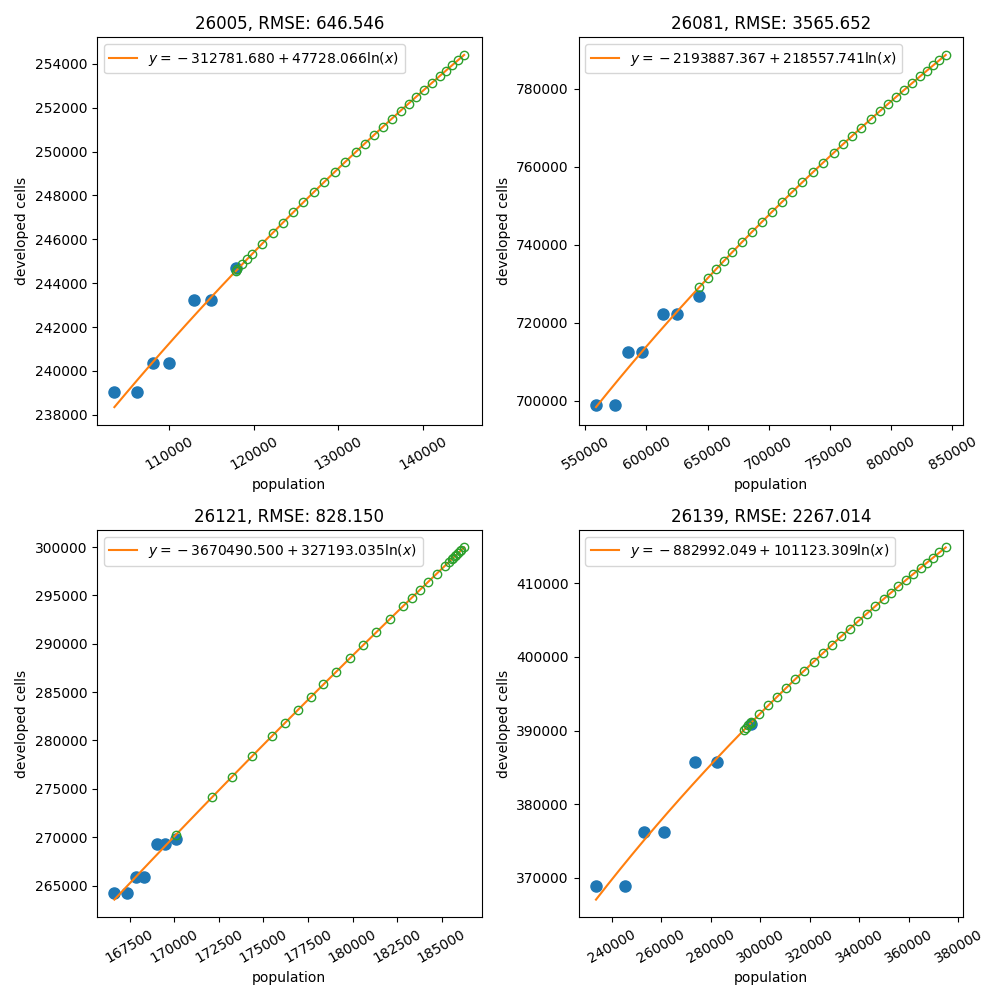

In [7]:
gs.run_command('r.futures.demand',
               development='urban_2001,urban_2004,urban_2006,urban_2008,urban_2011,urban_2013,urban_2016',
               subregions='GR_counties',
               observed_population='population_trend.csv',
               projected_population='population_projection_migration.csv',
               simulation_times= ','.join([str(i) for i in range(2016, 2045)]),
               plot='plot_demand_migration.png',
               demand='demand2016_migration.csv',
               method='logarithmic,logarithmic2,exp_approach')
               
Image('plot_demand_migration.png')

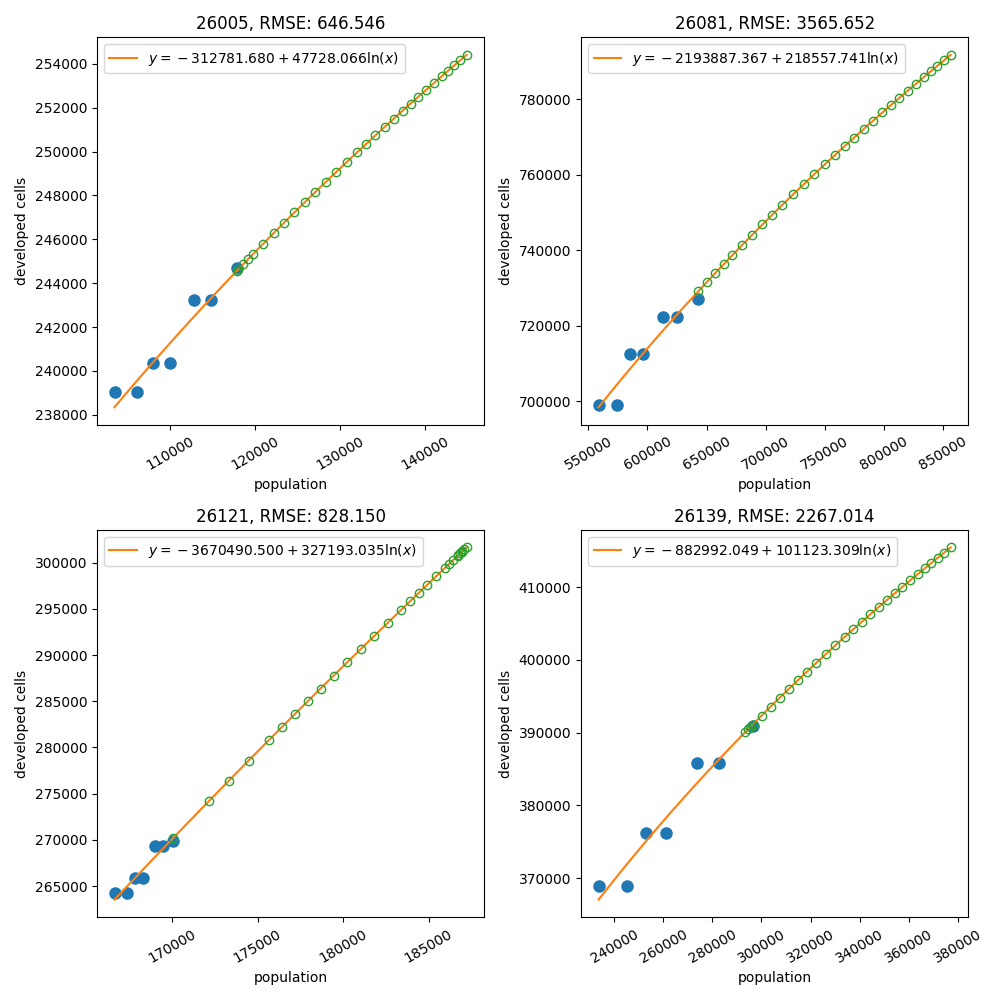

In [8]:
gs.run_command('r.futures.demand',
               development='urban_2001,urban_2004,urban_2006,urban_2008,urban_2011,urban_2013,urban_2016',
               subregions='GR_counties',
               observed_population='population_trend.csv',
               projected_population='population_projection_migration2x.csv',
               simulation_times= ','.join([str(i) for i in range(2016, 2045)]),
               plot='plot_demand_migration2x.png',
               demand='demand2016_migration2x.csv',
               method='logarithmic,logarithmic2,exp_approach')
               
Image('plot_demand_migration2x.png')

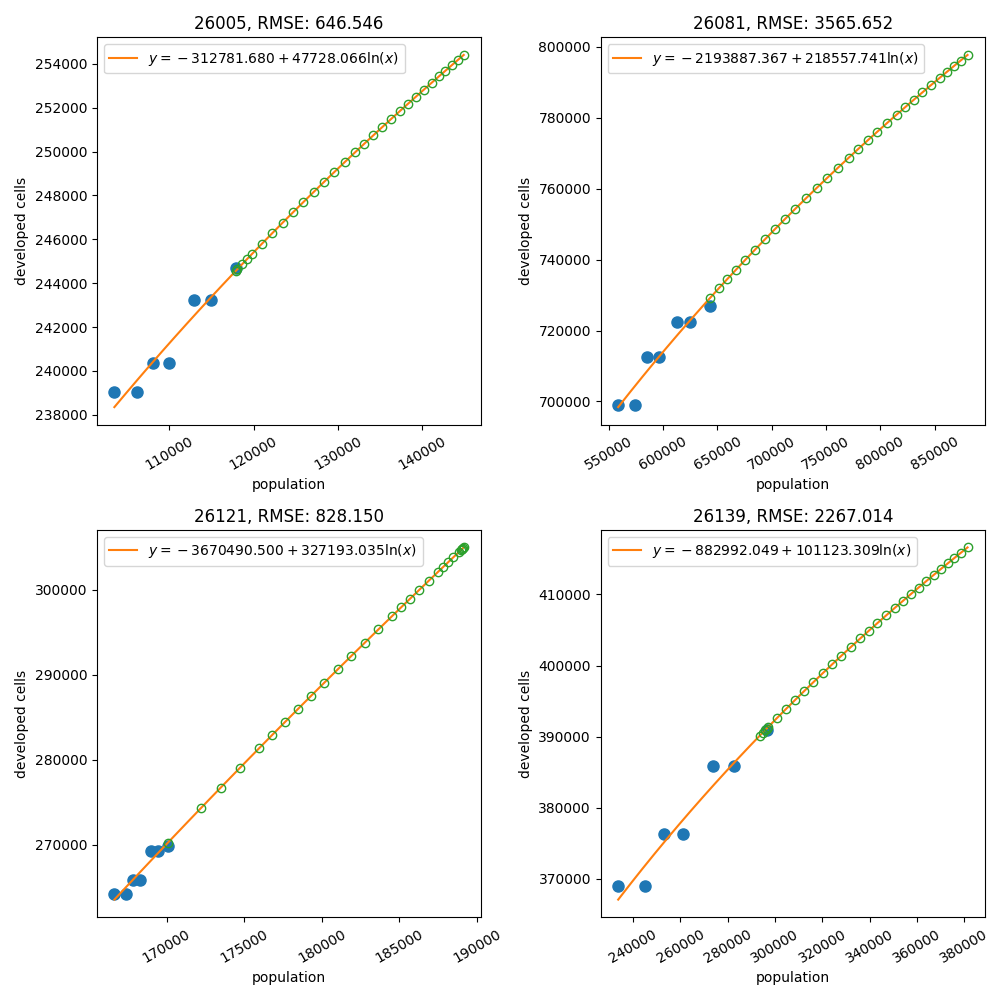

In [9]:
gs.run_command('r.futures.demand',
               development='urban_2001,urban_2004,urban_2006,urban_2008,urban_2011,urban_2013,urban_2016',
               subregions='GR_counties',
               observed_population='population_trend.csv',
               projected_population='population_projection_migration4x.csv',
               simulation_times= ','.join([str(i) for i in range(2016, 2045)]),
               plot='plot_demand_migration4x.png',
               demand='demand2016_migration4x.csv',
               method='logarithmic,logarithmic2,exp_approach')
               
Image('plot_demand_migration4x.png')

In [2]:
def run_futures_GR(disc_factor, comp_mean, comp_range, devpot_params, infill, name, repeat=10):
    # gs.run_command('r.futures.parallelpga', 
    #                overwrite=True,
    #                subregions='GR_counties@GR22', 
    #                developed='urban_2016@PERMANENT',
    #                predictors='Cost_dist_resc,DEM_GLISA,WB_dist_resc,GL_dist_resc,Canopy2016GLISA,OvPass_resc,Glisa_distProt_resc,Floodplain_GLISA,public_school_dist_m_resc,GLISA_buildings_resc',
    #                devpot_params=devpot_params, 
    #                development_pressure='devpressure_big_2016@Devpressure',
    #                n_dev_neighbourhood=30, 
    #                development_pressure_approach='gravity', 
    #                gamma=0.5, 
    #                scaling_factor=0.1,
    #                demand='demand_2016.csv', 
    #                discount_factor=disc_factor, compactness_mean=comp_mean, compactness_range=comp_range,
    #                patch_sizes='patches2022_hind.txt', 
    #                num_neighbors=4, 
    #                seed_search='probability',
    #                output=name, 
    #                nprocs=5, 
    #                incentive_power=infill,
    #                repeat=repeat) 
    for i in range(1, repeat+1):
        run = name + "_run" + str(i)
        gs.mapcalc(run+" = if("+run+" == -1, 0, 1)")

In [3]:
# Top performing patch parameters
disc_factor = 0.5
comp_mean = 0.1
comp_range = 0.05
repeat = 50


## Standard
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3.csv', 1, 'baseline', repeat)
## Infill
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3.csv', 5, 'infill', repeat)
## No flood
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3_noflood.csv', 1, 'noflood', repeat)
## Infill, no flood
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3_noflood.csv', 5, 'infill_noflood', repeat)

In [4]:
# Top performing patch parameters
disc_factor = 0.5
comp_mean = 0.1
comp_range = 0.05
repeat = 50

run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3.csv', 1, 'baseline_migration', repeat)
## Infill
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3.csv', 5, 'infill_migration', repeat)
## No flood
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3_noflood.csv', 1, 'noflood_migration', repeat)
## Infill, no flood
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3_noflood.csv', 5, 'infill_noflood_migration', repeat)

In [5]:
# Top performing patch parameters
disc_factor = 0.5
comp_mean = 0.1
comp_range = 0.05
repeat = 50

run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3.csv', 1, 'baseline_migration2x', repeat)
## Infill
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3.csv', 5, 'infill_migration2x', repeat)
## No flood
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3_noflood.csv', 1, 'noflood_migration2x', repeat)
## Infill, no flood
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3_noflood.csv', 5, 'infill_noflood_migration2x', repeat)

In [6]:
# Top performing patch parameters
disc_factor = 0.5
comp_mean = 0.1
comp_range = 0.05
repeat = 50

run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3.csv', 1, 'baseline_migration4x', repeat)
## Infill
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3.csv', 5, 'infill_migration4x', repeat)
## No flood
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3_noflood.csv', 1, 'noflood_migration4x', repeat)
## Infill, no flood
run_futures_GR(disc_factor, comp_mean, comp_range, 'Grand_Rapids_ss_round3_noflood.csv', 5, 'infill_noflood_migration4x', repeat)

In [13]:
def lu_stats(run, hazard):
    lustats = gs.read_command('r.stats', flags = 'c', input=run+',NLCD_2016_GLISA@PERMANENT')
    ag_loss = forest_loss = risk_dev = newurb = 0
    for line in lustats.strip().splitlines():
        cat1,cat2,cells = line.split()
        if cat1 == '1':
            if cat2 in ['81','82']:
                ag_loss += int(cells)
            elif cat2 in ['41','42','43']:
                forest_loss += int(cells)
        
    hazstats = gs.read_command('r.stats', flags = 'c', input=run+','+hazard) 
    for line in hazstats.strip().splitlines():
        cat1,cat2,cells = line.split()
        if cat1 == '1' and cat2 == '1':
            risk_dev += int(cells)
            
    urbstats = gs.read_command('r.stats', flags = 'c', input = run+',urban_2016@PERMANENT')
    for line in urbstats.strip().splitlines():
        cat1,cat2,cells = line.split()
        if cat1 == '1' and cat2 != '1':
            newurb += int(cells)
    
    return [ag_loss, forest_loss, risk_dev, newurb]

In [14]:
# remove previous mask
#gs.run_command('r.mask', flags = 'r')
#re-add
gs.run_command('r.mask', raster='statsmask@Hindcast22')

#initial = lu_stats("urban_2016", "Floodplain_GLISA@PERMANENT")

column_names = ['run', 'ag_loss', 'forest_loss', 'risk_dev', 'newurb']
basedf = pd.DataFrame(columns = column_names)
infilldf = pd.DataFrame(columns = column_names)
noflooddf = pd.DataFrame(columns = column_names)
infillnoflooddf = pd.DataFrame(columns = column_names)

for i in range(1, 51):
    run = 'baseline_run' + str(i)
    runstats = lu_stats(run, "Floodplain_GLISA")
    basedf.loc[len(basedf)] = [i] + runstats
    
for i in range(1, 51):
    run = 'infill_run' + str(i)
    runstats = lu_stats(run, "Floodplain_GLISA")
    infilldf.loc[len(infilldf)] = [i] + runstats
    
for i in range(1, 51):
    run = 'noflood_run' + str(i)
    runstats = lu_stats(run, "Floodplain_GLISA")
    noflooddf.loc[len(noflooddf)] = [i] + runstats
    
for i in range(1, 51):
    run = 'infill_noflood_run' + str(i)
    runstats = lu_stats(run, "Floodplain_GLISA")
    infillnoflooddf.loc[len(infillnoflooddf)] = [i] + runstats
    
infillnoflooddf.head()

,run,ag_loss,forest_loss,risk_dev,newurb
0,1,66067,45758,93532,125021
1,2,65792,45813,94130,125028
2,3,67207,44528,93739,125105
3,4,67225,44611,93520,125092
4,5,67225,44622,94085,125114


In [15]:
basedf.to_csv('basedf.csv')
infilldf.to_csv('infilldf.csv')
noflooddf.to_csv('noflooddf.csv')
infillnoflooddf.to_csv('infillnoflooddf.csv')

In [16]:
gs.mapcalc("freqmap_base = baseline_run1")
for i in range(2,51):
    gs.mapcalc("freqmap_base = freqmap_base + baseline_run"+str(i))
    
gs.mapcalc("freqmap_infill = infill_run1")
for i in range(2,51):
    gs.mapcalc("freqmap_infill = freqmap_infill + infill_run"+str(i))
    
gs.mapcalc("freqmap_noflood = noflood_run1")
for i in range(2,51):
    gs.mapcalc("freqmap_noflood = freqmap_noflood + noflood_run"+str(i))
    
gs.mapcalc("freqmap_infillnoflood = infill_noflood_run1")
for i in range(2,51):
    gs.mapcalc("freqmap_infillnoflood = freqmap_infillnoflood + infill_noflood_run"+str(i))